# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import os
import pprint
import seaborn as sns

sns.set(style="darkgrid")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

record = []
keep_cities = []
cloudiness = []
countries = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []


with open('processing_record.txt', 'w') as f:
    f.write("Beginning Data Retrieval \n ----------------------------- \n")
    for city in cities:
        query_url = f"{url}appid={api_key}&q={city}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        f.write(f"Processing Record {int(cities.index(city))+1} of Set 1 | {city} \n {query_url} \n")
        
        try:
            keep_cities.append(weather_json['name'])
            cloudiness.append(weather_json['clouds']['all'])
            countries.append(weather_json['sys']['country'])
            date.append(weather_json['dt'])
            humidity.append(weather_json['main']['humidity'])
            lat.append(weather_json['coord']['lat'])
            lng.append(weather_json['coord']['lon'])
            max_temp.append(weather_json['main']['temp_max'])
            wind.append(weather_json['wind']['speed'])
        except:
            print(f"Skipping {city}.")
            continue

Skipping attawapiskat.
Skipping sahrak.
Skipping illoqqortoormiut.
Skipping bargal.
Skipping taolanaro.
Skipping amderma.
Skipping tumannyy.
Skipping cumaribo.
Skipping cagayan de tawi-tawi.
Skipping sentyabrskiy.
Skipping warqla.
Skipping mys shmidta.
Skipping hvolsvollur.
Skipping palabuhanratu.
Skipping barentsburg.
Skipping samalaeulu.
Skipping bengkulu.
Skipping sinjah.
Skipping santa eulalia del rio.
Skipping yirol.
Skipping tsihombe.
Skipping grand river south east.
Skipping utiroa.
Skipping karakose.
Skipping rungata.
Skipping mananara.
Skipping nizhneyansk.
Skipping sataua.
Skipping ngama.
Skipping olafsvik.
Skipping saleaula.
Skipping aybak.
Skipping hihifo.
Skipping saryshagan.
Skipping kazalinsk.
Skipping tabiauea.
Skipping vaitupu.
Skipping asau.
Skipping samusu.
Skipping bolungarvik.
Skipping belushya guba.
Skipping fevralsk.
Skipping kamenskoye.
Skipping karaul.
Skipping toliary.
Skipping anar darreh.
Skipping umzimvubu.
Skipping jahrom.
Skipping mergui.
Skipping acarau.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
weather_dict = {
    "City": keep_cities,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind,
}
weather_data = pd.DataFrame(weather_dict)
print(f"Number of cities after dropped NaN values is {len(weather_data)}.")
weather_data.head(20)

Number of cities after dropped NaN values is 565.


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,37,AU,<class 'datetime.date'>,65,-33.21,138.60,287.42,4.59
1,Port Elizabeth,75,US,<class 'datetime.date'>,55,39.31,-74.98,294.26,3.10
2,Albany,40,US,<class 'datetime.date'>,46,42.65,-73.75,295.37,6.20
3,Busselton,51,AU,<class 'datetime.date'>,64,-33.64,115.35,279.82,4.04
4,Punta Arenas,40,CL,<class 'datetime.date'>,62,-53.16,-70.91,284.82,12.90
5,Torbay,90,CA,<class 'datetime.date'>,93,47.66,-52.73,280.15,6.70
6,Saint-Pierre,0,FR,<class 'datetime.date'>,48,48.95,4.24,292.59,2.10
7,Norman Wells,20,CA,<class 'datetime.date'>,59,65.28,-126.83,276.15,3.60
8,Broome,0,GB,<class 'datetime.date'>,44,52.47,1.45,292.59,2.10
9,Pangnirtung,20,CA,<class 'datetime.date'>,72,66.15,-65.72,261.15,4.10


In [38]:
today = str(date.today())
print(today) 

2019-04-21


In [39]:
# save as csv
weather_data.to_csv(f"Output/weather_data{today}.csv", index=False, header=True)

In [70]:
# USE CSV FROM HERE ON
# Only works if calling api and using data chart from same day.
weather_csv = f"Output/weather_data{today}.csv"
weather_df = pd.read_csv(weather_csv)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,37,AU,<class 'datetime.date'>,65,-33.21,138.60,287.42,4.59
1,Port Elizabeth,75,US,<class 'datetime.date'>,55,39.31,-74.98,294.26,3.10
2,Albany,40,US,<class 'datetime.date'>,46,42.65,-73.75,295.37,6.20
3,Busselton,51,AU,<class 'datetime.date'>,64,-33.64,115.35,279.82,4.04
4,Punta Arenas,40,CL,<class 'datetime.date'>,62,-53.16,-70.91,284.82,12.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

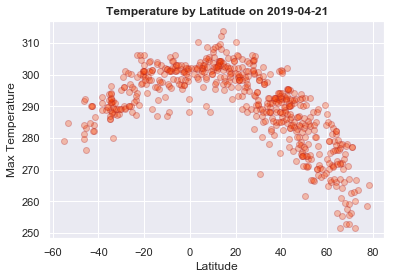

In [74]:
# latitude vs temperature
lat_list = weather_df['Lat']
x_axis = np.arange(-90, 90, 30)
max_temp_list = weather_df['Max Temp']

plt.scatter(lat_list, max_temp_list, marker="o", facecolors= "orangered", 
            edgecolors="firebrick", alpha=.3)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Temperature by Latitude on {today}", weight="bold")

plt.savefig(f'Charts/Temperature{today}.png', dpi=300)
plt.show()

#### Latitude vs. Humidity Plot

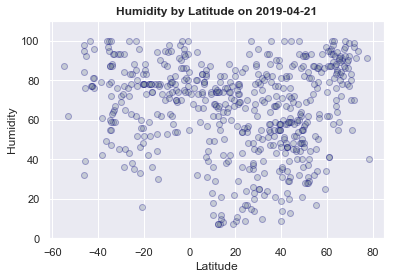

In [73]:
lat_list = weather_df['Lat']
x_axis = np.arange(-90, 90, 30)
humid_list = weather_df['Humidity']

plt.scatter(lat_list, humid_list, marker="o", facecolors="slategray", 
            edgecolors="navy", alpha=.3)

plt.ylim(0, 110)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity by Latitude on {today}", weight="bold")

plt.savefig(f'Charts/Humidity{today}.png', dpi=300)
plt.show()

#### Latitude vs. Cloudiness Plot

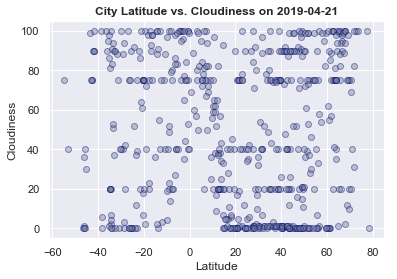

In [75]:
lat_list = weather_df['Lat']
x_axis = np.arange(-90, 90, 30)
cloud_list = weather_df['Cloudiness']
# opacity = [int(i) for i in cloud_list]
date_max = weather_df['Date'].max()
date_min = weather_df['Date'].min() #CONVERT DATES

plt.scatter(lat_list, cloud_list, marker="o", facecolors="slategray", 
            edgecolors="navy", alpha=.4)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness on {today}", weight="bold")

plt.savefig(f'Charts/Cloudiness{today}.png', dpi=300)
plt.show()

#### Latitude vs. Wind Speed Plot

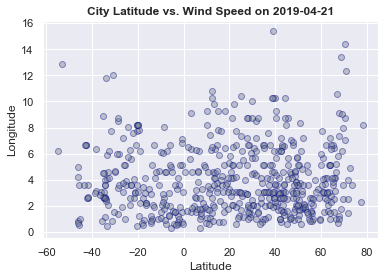

In [78]:
lat_list = weather_df['Lat']
x_axis = np.arange(-90, 90, 30)
wind_list = weather_df['Wind Speed']

plt.scatter(lat_list, wind_list, marker="o", facecolors="slategray", 
            edgecolors="navy", alpha=.4)

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title(f"City Latitude vs. Wind Speed on {today}", weight="bold")

plt.savefig(f'Charts/Windspeed{today}.png', dpi=300)
plt.show()

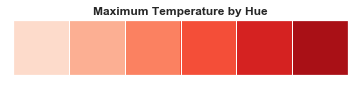

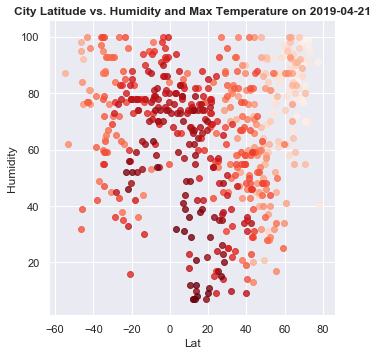

In [80]:
# BONUS PLOT using Seaborn
sns.palplot(sns.color_palette("Reds"))
plt.title(f"Maximum Temperature by Hue", weight="bold")

sns.lmplot(x='Lat', y='Humidity', hue = "Max Temp",
           data=weather_df, fit_reg=False, legend=False, palette = "Reds")

plt.title(f"City Latitude vs. Humidity and Max Temperature on {today}", weight="bold")

plt.savefig(f'Charts/Humidity_MaxTemp{today}.png', dpi=300)
plt.show()